In [23]:
import pandas as pd
import autograd.numpy as np_
from autograd import grad
import numpy as np

In [2]:
df = pd.read_csv('jogadas.csv')

df

,Objeto,Altura (cm),Tempo (segundos),T^2/2
0,canetao,185,0.720,0.259200
1,canetao,156,0.470,0.110450
2,canetao,156,0.530,0.140450
3,canetao,183,0.575,0.165313
4,canetao,183,0.480,0.115200
5,canetao,183,0.550,0.151250
6,canetao,183,0.565,0.159612
7,canetao,183,0.575,0.165313
8,canetao,160,0.505,0.127513
9,canetao,160,0.500,0.125000


## Primeira Fórmula
$$
y^{est} = ax
$$

In [3]:
df = pd.read_csv('jogadas.csv')
df = df.drop(columns=['Objeto'])


ym = df['Altura (cm)'].to_numpy()
ym = ym.astype(float)/100


x = df['T^2/2'].to_numpy()


def erro( parametros ):
    a, x, ym = parametros
    yhat = a * x
    mse = np_.mean((yhat-ym)**2.0)
    return mse

g = grad(erro)

a_modelo = 0.0

a_list = []
alpha = 0.001
for _ in range(100000): 
    da, dx, dy = g((a_modelo,x,ym))
    a_modelo = a_modelo - alpha*da
    a_list.append(a_modelo)


print(a_modelo)

9.62472935354167


## Segunda Fórmula
$$
y^{est} = ax
$$

In [32]:
df = pd.read_csv('jogadas.csv')
df = df.drop(columns=['Objeto'])
df

ym = df['Altura (cm)'].to_numpy()
ym = ym.astype(float)/100
x = df['T^2/2'].to_numpy()


def erro( parametros ):
    a, b, c, x, ym = parametros
    yhat = a * x + b * (x**2) + c * (x**3)
    mse = np_.mean((yhat-ym)**2.0)
    return mse

g = grad(erro)

a_modelo = 0.0
b_modelo = 0.0
c_modelo = 0.0

a_list = []
b_list = []
c_list = []
alpha = 0.1
for _ in range(100000): 
    da, db, dc, dx, dy = g((a_modelo,b_modelo,c_modelo,x,ym))
    a_modelo = a_modelo - alpha*da
    b_modelo = b_modelo - alpha*db
    c_modelo = c_modelo - alpha*dc
    a_list.append(a_modelo)
    b_list.append(b_modelo)
    c_list.append(c_modelo)

print(a_modelo)
print('A Modelo: ', a_modelo)
print('B Modelo: ', b_modelo)
print('C Modelo: ', c_modelo)

16.725654286010233
A Modelo:  16.725654286010233
B Modelo:  -32.96923468259445
C Modelo:  -13.132334974558432


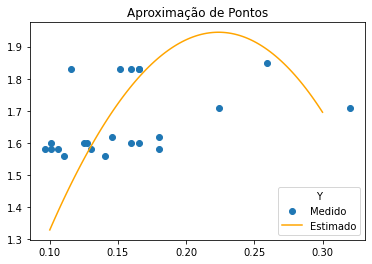

In [33]:
import matplotlib.pyplot as plt

t = np.linspace(0.1,0.3,100)

yest = a_modelo * t + b_modelo * (t**2) + c_modelo * (t**3)

plt.figure()
plt.scatter(x,ym,label='Medido')
plt.plot(t,yest,label='Estimado',color='ORANGE')
plt.title('Aproximação de Pontos')
plt.legend(title='Y')
plt.show()

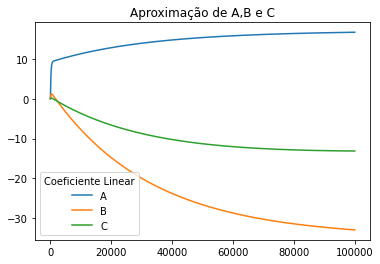

In [34]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(a_list, label='A')
plt.plot(b_list, label='B')
plt.plot(c_list, label='C')
plt.title('Aproximação de A,B e C')
plt.legend(title='Coeficiente Linear')
plt.show()